In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/titanic.csv')

In [6]:
df=df.drop(['PassengerId','SibSp','Parch','Embarked'],axis='columns')

In [9]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [10]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred=model.predict(X_test)

In [16]:
print ("Accuracy: ",accuracy_score(y_test,y_pred))


Accuracy:  1.0


In [17]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[2]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [19]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


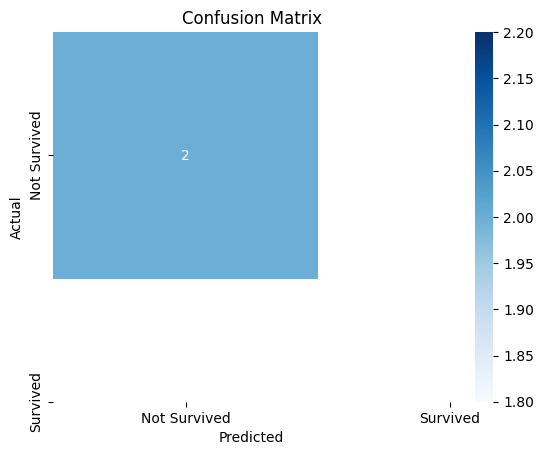

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
custom_passenger = [[2, 1, 30, 20.0]]

In [22]:
prediction = model.predict(custom_passenger)
result = 'Survived' if prediction[0] == 1 else 'Did Not Survive'

print("\nPrediction for custom passenger:")
print("Result:", result)


Prediction for custom passenger:
Result: Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
